In [13]:
import os, sys, warnings

cur_dir = os.path.dirname(os.getcwd())
sys.path.append(cur_dir)

from src.utils import load_data, process_data, train_and_evaluate_model


In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

number of classes: 10
Training model: With Synthetic Data
Epoch 1/15, Loss: 1.0128
Epoch 2/15, Loss: 0.7932
Epoch 3/15, Loss: 0.7392
Epoch 4/15, Loss: 0.7123
Epoch 5/15, Loss: 0.6929
Epoch 6/15, Loss: 0.6787
Epoch 7/15, Loss: 0.6678
Epoch 8/15, Loss: 0.6592
Epoch 9/15, Loss: 0.6511
Epoch 10/15, Loss: 0.6453
Epoch 11/15, Loss: 0.6398
Epoch 12/15, Loss: 0.6338
Epoch 13/15, Loss: 0.6292
Epoch 14/15, Loss: 0.6240
Epoch 15/15, Loss: 0.6200

Test Accuracy: 69.18%

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.09      0.00      0.01       583
           DoS       1.00      0.01      0.01      4089
      Exploits       0.47      0.87      0.61     11132
       Fuzzers       0.23      0.58      0.33      6062
       Generic       1.00      0.95      0.98     18871
        Normal       0.95      0.62      0.76     37000
Reconnaissance       0.60      0.73      0.66      3496
     Shel

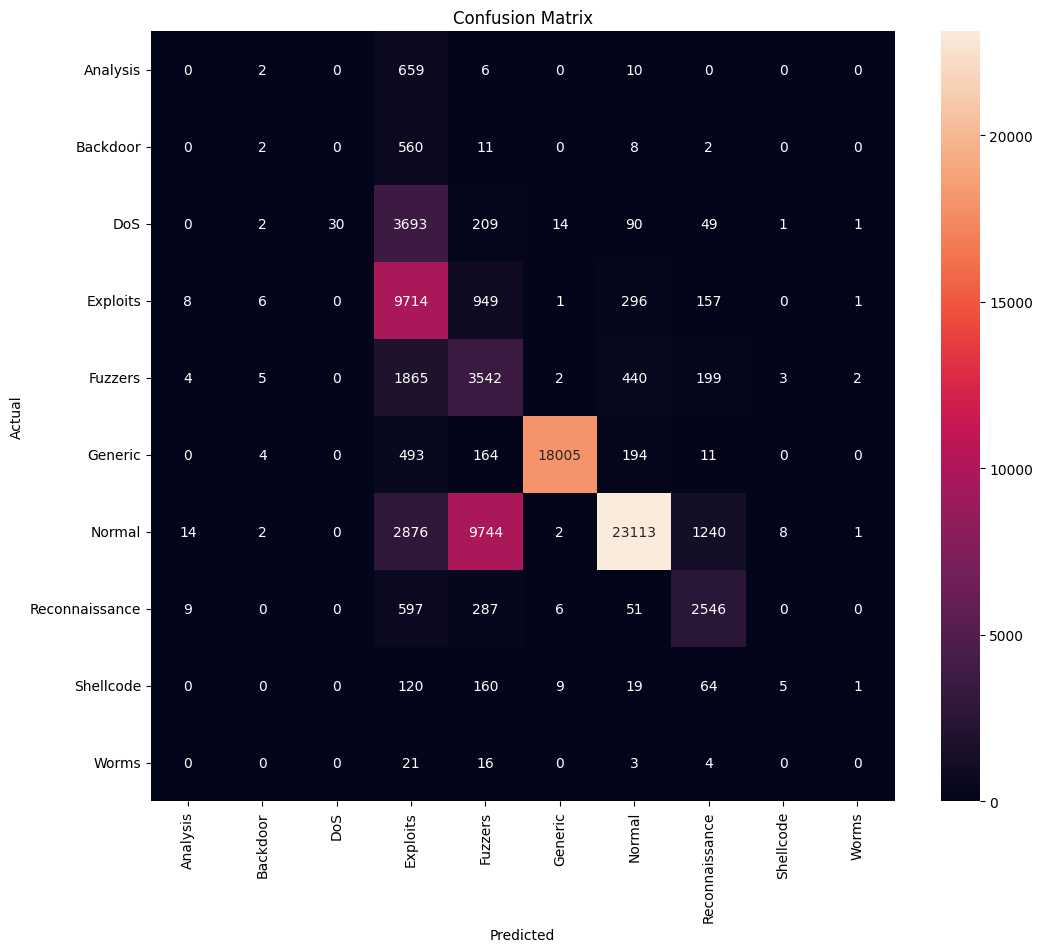

number of classes: 10
Training model: Without Synthetic Data
Epoch 1/15, Loss: 0.9387
Epoch 2/15, Loss: 0.7705
Epoch 3/15, Loss: 0.7167
Epoch 4/15, Loss: 0.6920
Epoch 5/15, Loss: 0.6769
Epoch 6/15, Loss: 0.6660
Epoch 7/15, Loss: 0.6573
Epoch 8/15, Loss: 0.6492
Epoch 9/15, Loss: 0.6431
Epoch 10/15, Loss: 0.6376
Epoch 11/15, Loss: 0.6328
Epoch 12/15, Loss: 0.6278
Epoch 13/15, Loss: 0.6248
Epoch 14/15, Loss: 0.6208
Epoch 15/15, Loss: 0.6184

Test Accuracy: 69.94%

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.00      0.00      0.00       583
           DoS       1.00      0.01      0.01      4089
      Exploits       0.45      0.90      0.60     11132
       Fuzzers       0.25      0.50      0.33      6062
       Generic       0.99      0.96      0.98     18871
        Normal       0.95      0.64      0.77     37000
Reconnaissance       0.62      0.74      0.68      3496
     S

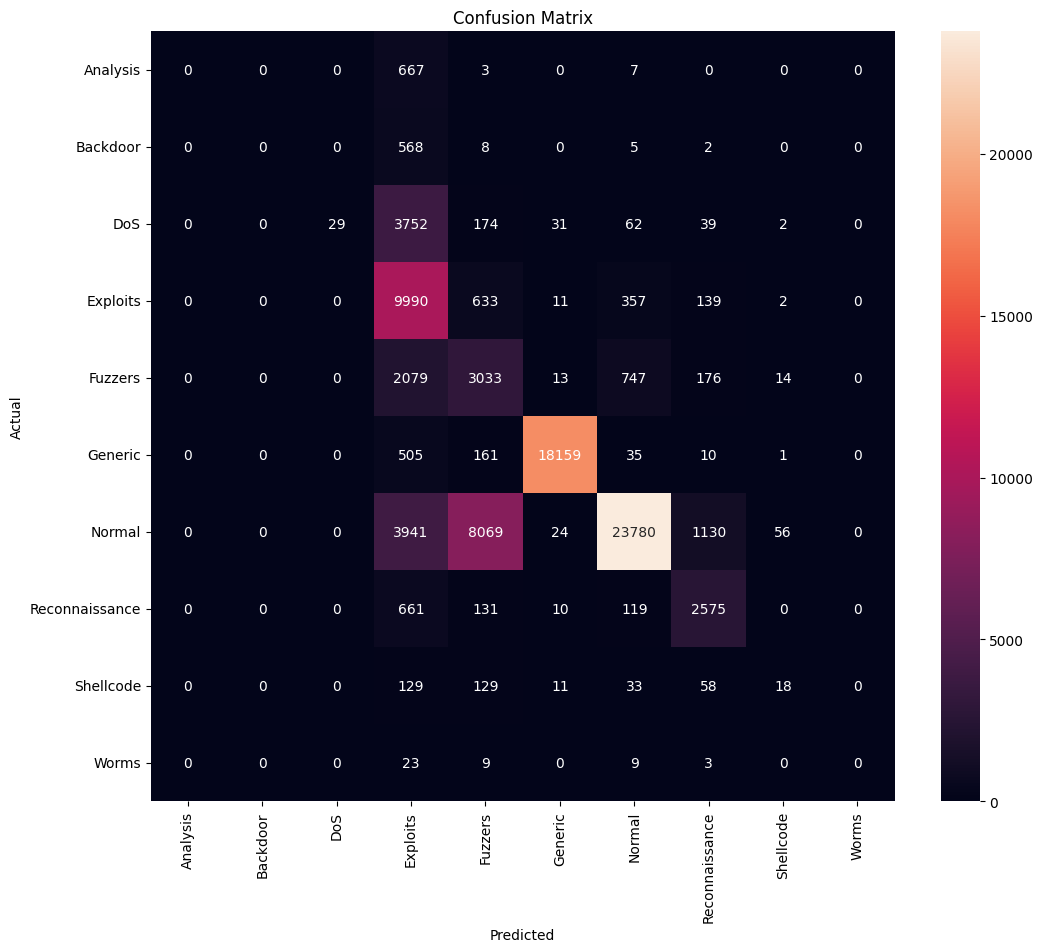

In [17]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

BASE_DATA_DIR = os.path.dirname(os.getcwd())
df_train, df_test = load_data(base_data_dir=BASE_DATA_DIR)
target_variable = 'attack_cat'

# with synthetic augmentation
X_train_syn, X_test_syn, y_train_syn, y_test_syn, le_target = process_data(
    df_train, df_test, target_variable=target_variable, use_synthetic=True
)
    
model_syn = train_and_evaluate_model(
    X_train_syn, y_train_syn, X_test_syn, y_test_syn, le_target,
    model_label="With Synthetic Data"
)

# without synthetic augmentation
X_train_base, X_test_base, y_train_base, y_test_base, le_target = process_data(
    df_train, df_test, target_variable=target_variable, use_synthetic=False
)
model_base = train_and_evaluate_model(
    X_train_base, y_train_base, X_test_base, y_test_base, le_target,
    model_label="Without Synthetic Data"
)